### Naive Bayes Classification for Face-Mask Detection



#### Import Libraries

In [ ]:
# Import Libraries
import numpy as np 

import sklearn
import sklearn.naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import pickle
import cv2
from cv2 import cv2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### EDA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Face-Mask-Dataset

/content/drive/.shortcut-targets-by-id/1PPafcxxA7mViQpMt0wWWKP6k38Lp7jyJ/Face-Mask-Dataset


In [ ]:
x_path = '/content/drive/MyDrive/Face-Mask-Dataset/X.pickle'
y_path = '/content/drive/MyDrive/Face-Mask-Dataset/y.pickle'

X = pickle.load(open(x_path, 'rb'))
y = pickle.load(open(y_path, 'rb'))

CATEGORIES = ['Without Mask', 'Incorrectly Wearing Mask', 'Wearing Mask']

In [ ]:
print('Type X:', type(X))
print('Type y:', type(y), end='\n\n')

print('X Shape:', X.shape)
print('y Shape:', y.shape)

Type X: <class 'numpy.ndarray'>
Type y: <class 'numpy.ndarray'>

X Shape: (17836, 64, 64)
y Shape: (17836,)


Random Image from X:



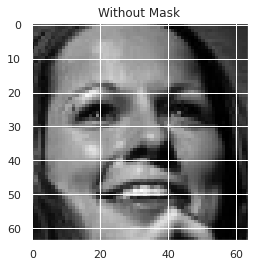

In [ ]:
index = 1113
random_img = X[index]
random_img_label = CATEGORIES[y[index]]

print('Random Image from X:')
plt.imshow(random_img, cmap='gray')
plt.title(random_img_label)

print()

In [ ]:
# Định hình lại kích thước để giảm tiêu thụ RAM
reshaped_size = 64
print('Before Reshaping size:', X.shape)

resized_X = []
for img in X:
  resized_X.append(cv2.resize(img, (reshaped_size, reshaped_size)))

X = np.asarray(resized_X)
del resized_X

print('After Reshaping Size: ', X.shape)

Before Reshaping size: (17836, 64, 64)
After Reshaping Size:  (17836, 64, 64)


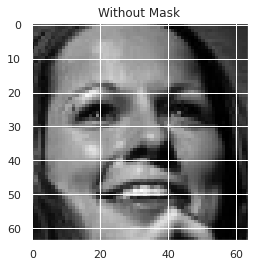

In [ ]:
plt.imshow(X[index], cmap='gray')
plt.title(CATEGORIES[y[index]])
print()


In [ ]:
# Định hình lại thành 1d cho Naive Bayes 
print('Before Reshaping to 1D:', X.shape)
X = X.reshape(-1, reshaped_size*reshaped_size)
print('After Reshaping to 1D: ', X.shape)

Before Reshaping to 1D: (17836, 64, 64)
After Reshaping to 1D:  (17836, 4096)


Double Check: Img still holds after reshape (64, 64)



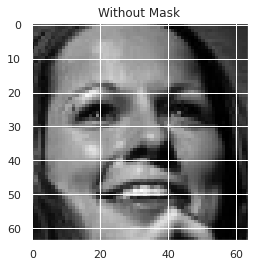

In [ ]:
same_img = np.reshape(X[index], (reshaped_size, reshaped_size))
print('Double Check: Img still holds after reshape', same_img.shape)
plt.imshow(same_img, cmap='gray')
plt.title(CATEGORIES[y[index]])
print()

In [ ]:
# Chuẩn hóa dữ liệu
X = X / 255.0
print('Domain: [',X.min(),',', X.max(), ']')

Domain: [ 0.0 , 1.0 ]


In [ ]:
# Tách tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Initialize Naive Bayes Classification model
gnb = GaussianNB()

# Use training data to fit Naive Bayes model
gnb.fit(X_train, y_train.ravel())


GaussianNB()

In [ ]:
%%time
# make prediction on entire test data
predictions_set2 = gnb.predict(X_test)

CPU times: user 332 ms, sys: 752 µs, total: 332 ms
Wall time: 338 ms


In [ ]:
# Save Predictions in a pickle
pickle_out = open("predictions_set2.pickle", "wb")
pickle.dump(predictions_set2, pickle_out)
pickle_out.close()

#### GaussianNB w/o Hyperparameter tuning


In [ ]:
# xây dựng Gaussian Naive Bayes
gaussianNB_model = sklearn.naive_bayes.GaussianNB()

# Training
gaussianNB_model.fit(X_train, y_train)

GaussianNB()

GaussianNB Metrics

Accuracy: 0.781390

Recall: 0.781390

F1 Score: 0.781390



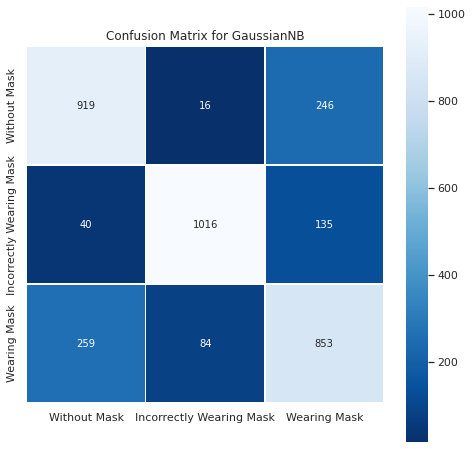

In [ ]:
# Đánh giá
gnb_y_pred = gaussianNB_model.predict(X_test)

print('GaussianNB Metrics', end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, gnb_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, gnb_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, gnb_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, gnb_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for GaussianNB')

print()

#### MultinomialNB w/o Hyperparameter Tuning

In [ ]:
# Xây dựng Multinomial Naive Bayes
multinomialNB_model = sklearn.naive_bayes.MultinomialNB()

In [ ]:
# Training
multinomialNB_model.fit(X_train, y_train)

MultinomialNB()

MultinomialNB Metrics

Accuracy: 0.679652

Recall: 0.679652

F1 Score: 0.679652



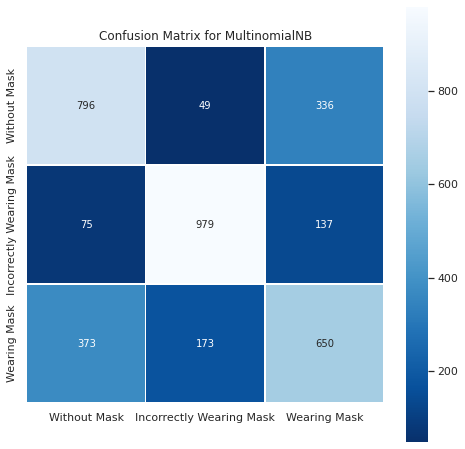

In [ ]:
# Đánh giá
mnb_y_pred = multinomialNB_model.predict(X_test)

print('MultinomialNB Metrics', end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, mnb_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, mnb_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, mnb_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, mnb_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for MultinomialNB')

print()

#### GaussianNB with Hyperparameter tuning

In [ ]:
%%time

# Gridsearch for GaussianNB
params = {
    'var_smoothing' : [1e-09, 1e-07, 1e-05, 1e-03, 1, 100]
}

# Điều chỉnh siêu tham số
grid_search_cv = sklearn.model_selection.GridSearchCV(sklearn.naive_bayes.GaussianNB(), param_grid=params, scoring='accuracy', n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

CPU times: user 1.24 s, sys: 353 ms, total: 1.59 s
Wall time: 30.2 s


In [ ]:
print('Best param for \'var_smoothing\':', grid_search_cv.best_params_)
print('With Accuracy of %f' % grid_search_cv.best_score_)

Best param for 'var_smoothing': {'var_smoothing': 1e-09}
With Accuracy of 0.781259


GaussianNB with 'var_smoothing' of 0.000000 Metrics

Accuracy: 0.781390

Recall: 0.781390

F1 Score: 0.781390



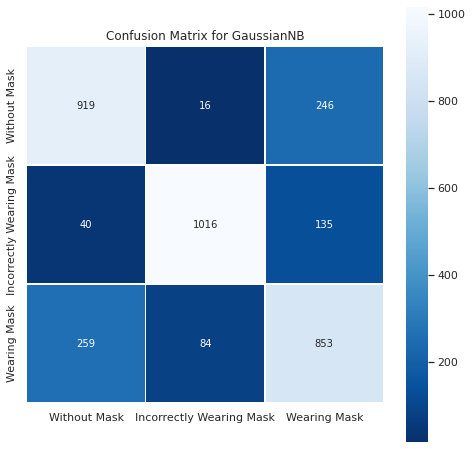

In [ ]:
# Chọn mô hình hoạt động tốt nhất
gnb_model = grid_search_cv.best_estimator_

gnb_gs_y_pred = gnb_model.predict(X_test)

print('GaussianNB with \'var_smoothing\' of %f Metrics' % grid_search_cv.best_params_['var_smoothing'], end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, gnb_gs_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, gnb_gs_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, gnb_gs_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, gnb_gs_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for GaussianNB')

print()

#### MultinomialNB with Hyperparameter tuning

In [ ]:
# Điều chỉnh siêu tham số cho Hyperparameter Naive Bayes
params = {
    'alpha' : [0.1, 0.5, 1, 2, 5, 100],
}
grid_search_cv = sklearn.model_selection.GridSearchCV(
    sklearn.naive_bayes.MultinomialNB(),
    param_grid=params,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 100]},
             scoring='accuracy')

In [ ]:
print('Best params:', grid_search_cv.best_params_)
print('With Accuracy of %f ' % grid_search_cv.best_score_)

Best params: {'alpha': 100}
With Accuracy of 0.690777 


MultinomialNB with 'alpha' of 100.000000 Metrics

Accuracy: 0.680213

Recall: 0.680213

F1 Score: 0.680213



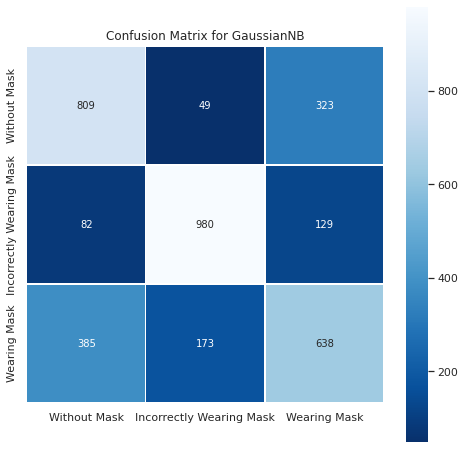

In [ ]:
mnb_model = grid_search_cv.best_estimator_

mnb_gs_y_pred = mnb_model.predict(X_test)

print('MultinomialNB with \'alpha\' of %f Metrics' % grid_search_cv.best_params_['alpha'], end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, mnb_gs_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, mnb_gs_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, mnb_gs_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, mnb_gs_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for GaussianNB')

print()